#***Fertilizer Recomendation Model***


## Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
import warnings
import seaborn as sns
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')

## Reading The Dataset

In [87]:
fertilizer_dataset = pd.read_csv("/content/drive/MyDrive/Dataset/Fertilizer/Fertilizer Prediction.csv");
dataset_for_null_filling = pd.read_excel("/content/drive/MyDrive/Dataset/Fertilizer/Fertilizer refrence for missing values.xlsx")

## Exploring The Dataset 1

In [88]:
fertilizer_dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [89]:
dataset_for_null_filling.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,Fourteen-Thirty Five-Fourteen
3,22,0,20,Twenty Eight-Twenty Eight
4,35,0,0,Urea


In [90]:
print(fertilizer_dataset['Fertilizer Name'].unique())

['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


In [91]:
fertilizer_dataset['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [92]:
# Shapes
print("The Shape of the Dataset is: {}" .format(fertilizer_dataset.shape))

The Shape of the Dataset is: (99, 9)


In [93]:
# Data types
print("crop dataset type 1\n")
print(fertilizer_dataset.dtypes)

crop dataset type 1

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object


In [94]:
# Descriptive Statistics
fertilizer_dataset.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [95]:
# Knowing unique values and there length
print("Number of labels: {}".format(fertilizer_dataset['Fertilizer Name'].nunique()))
print(fertilizer_dataset['Fertilizer Name'].value_counts())

Number of labels: 7
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64


In [96]:
# Check null values
print(fertilizer_dataset.isnull().any())

Temparature        False
Humidity           False
Moisture           False
Soil Type          False
Crop Type          False
Nitrogen           False
Potassium          False
Phosphorous        False
Fertilizer Name    False
dtype: bool


# Data visualization

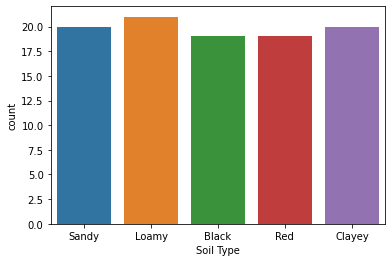

In [97]:
sns.countplot(x='Soil Type', data = fertilizer_dataset)

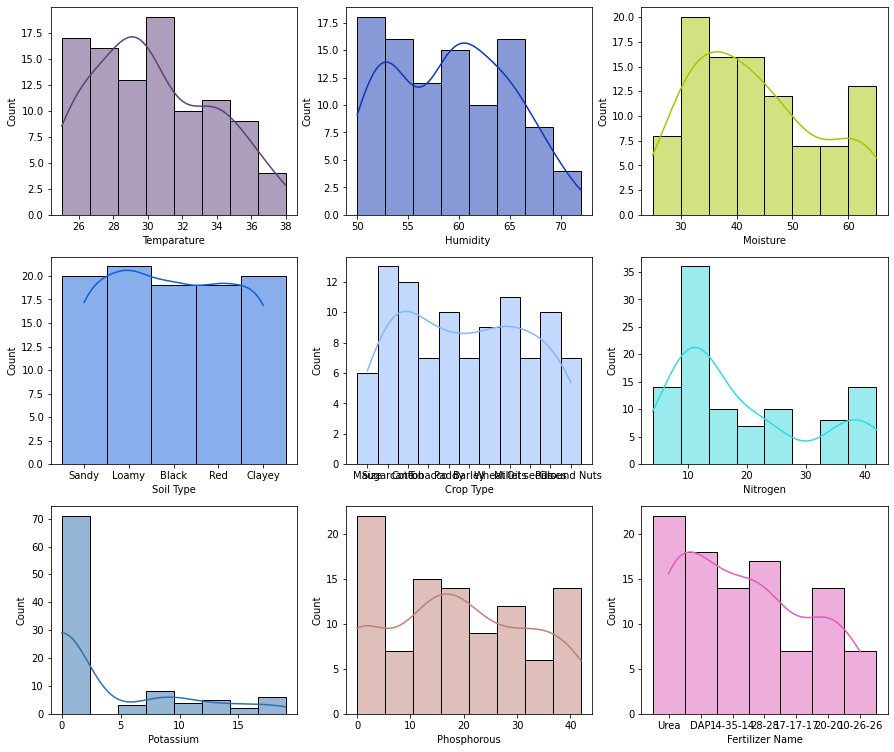

In [98]:
columns1 = fertilizer_dataset.columns
#Distribution
plt.figure(figsize=(15,13))
i = 1
for column in columns1:
    plt.subplot(3,3,i)
    rgb = np.random.rand(3,)
    sns.histplot(fertilizer_dataset[column], kde = True, color = rgb, element = 'bars')
    i+=1
plt.show()

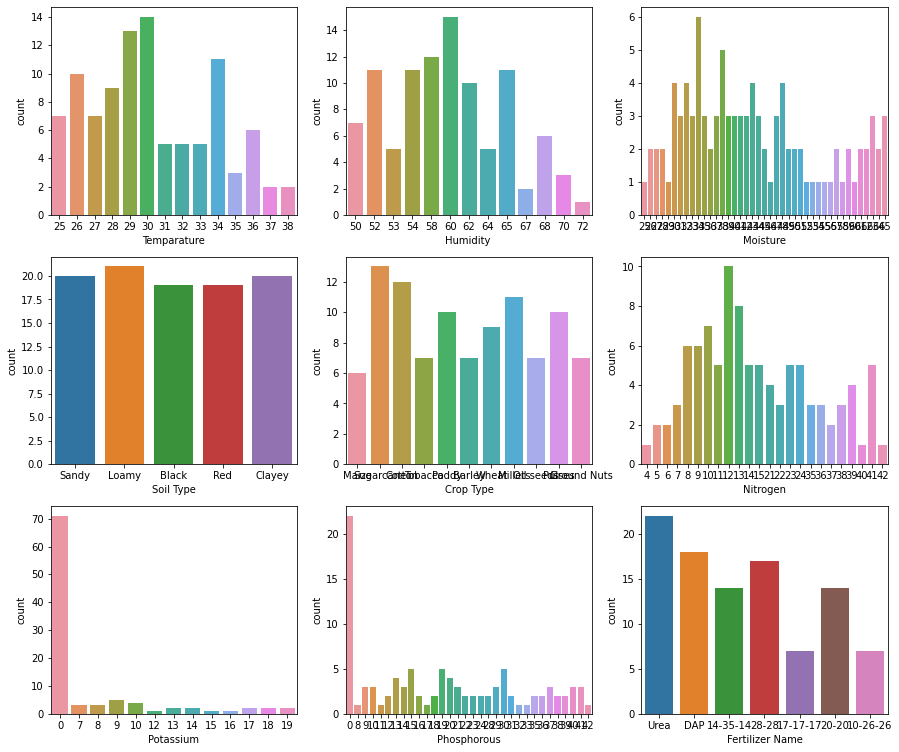

In [99]:
plt.figure(figsize=(15,13))
i = 1
for column in columns1:
    plt.subplot(3,3,i)
    rgb = np.random.rand(3,)
    sns.countplot(x=column, data = fertilizer_dataset)
    i+=1
plt.show()


In [100]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = fertilizer_dataset['Fertilizer Name'])
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = fertilizer_dataset['Fertilizer Name'], ax=axes[1])

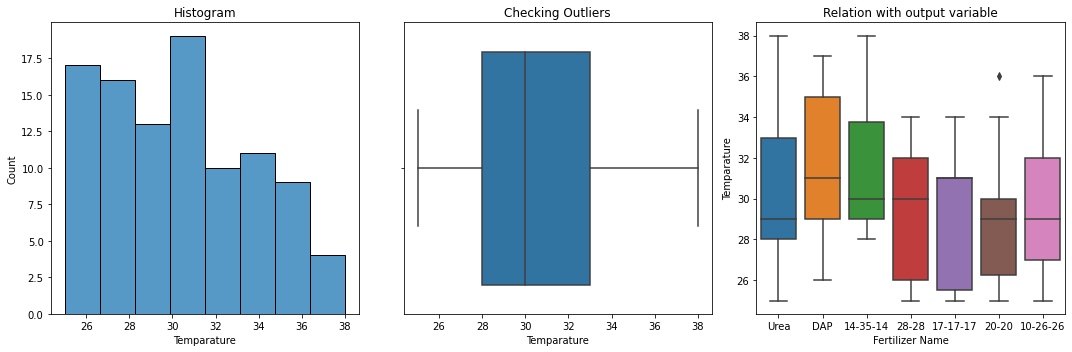

In [101]:
#EDA - Temparature variable
plot_conti(fertilizer_dataset['Temparature'])

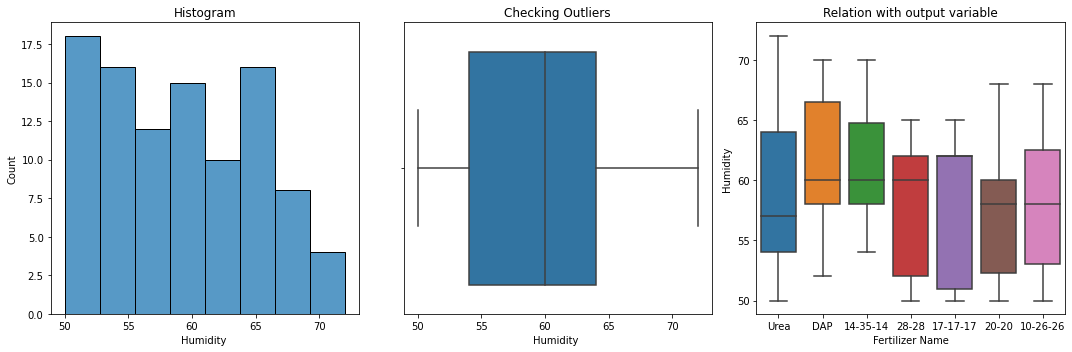

In [102]:
#EDA - Humidity variable
plot_conti(fertilizer_dataset['Humidity '])

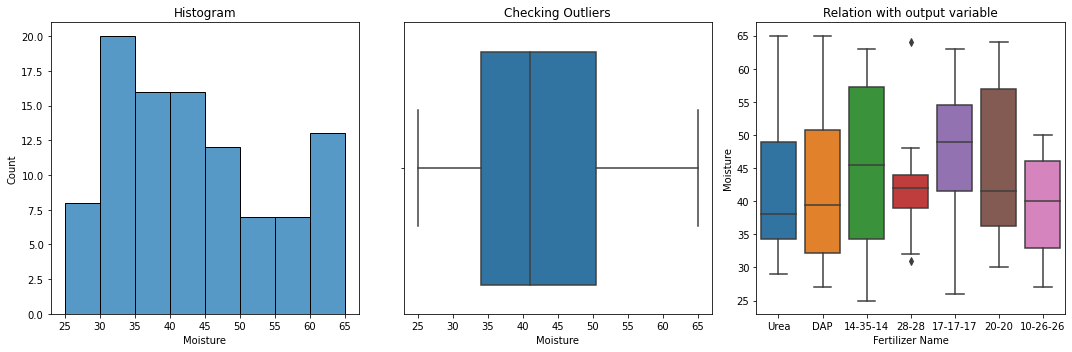

In [103]:
#EDA - Moisture variable
plot_conti(fertilizer_dataset['Moisture'])

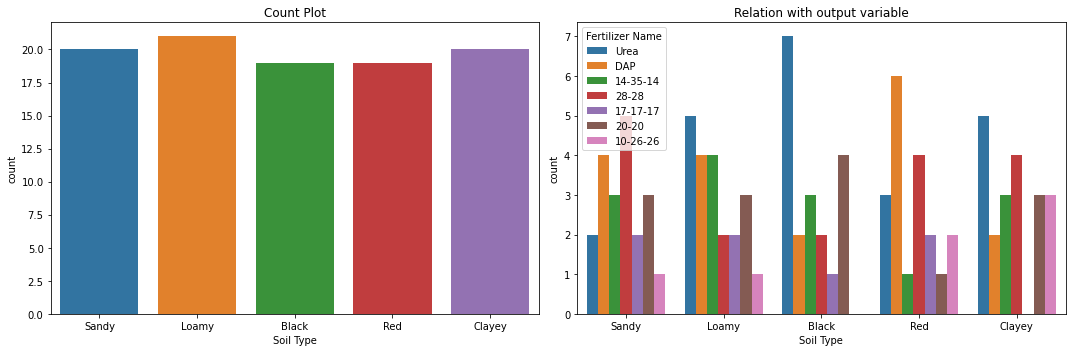

In [104]:
plot_cato(fertilizer_dataset['Soil Type'])

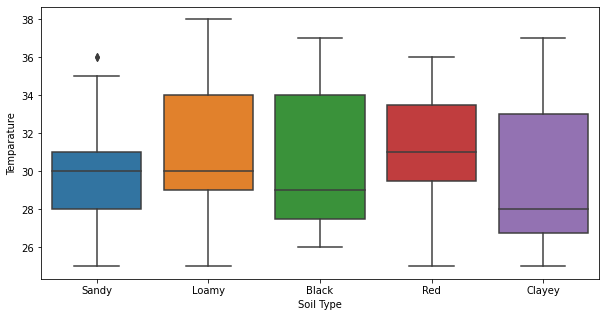

In [105]:
#relation of soil type with Temperature 
plt.figure(figsize=(10,5))
sns.boxplot(x=fertilizer_dataset['Soil Type'],y=fertilizer_dataset['Temparature'])

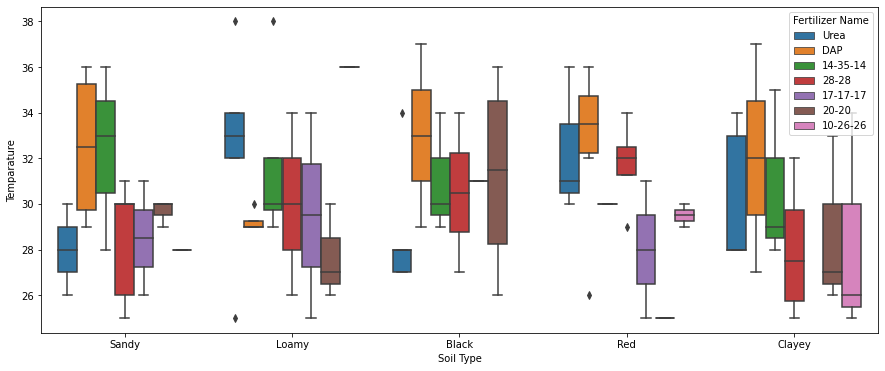

In [106]:
#relation of soil type and Temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=fertilizer_dataset['Soil Type'],y=fertilizer_dataset['Temparature'],hue=fertilizer_dataset['Fertilizer Name'])

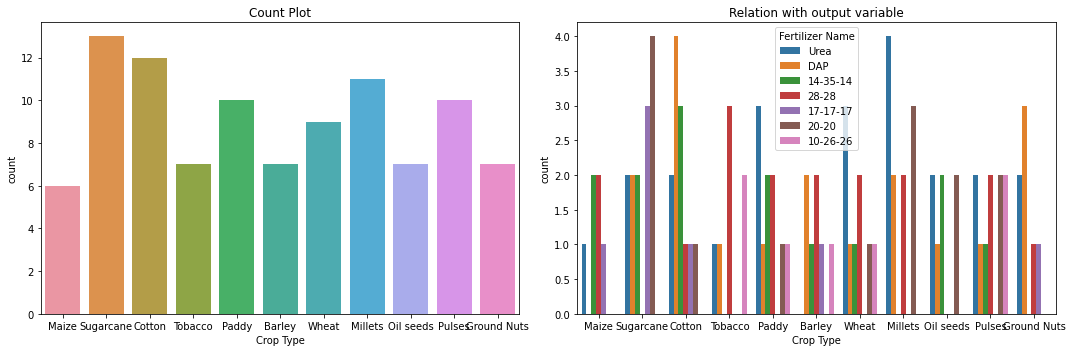

In [107]:
#EDA - Crop_Type variable
plot_cato(fertilizer_dataset['Crop Type'])

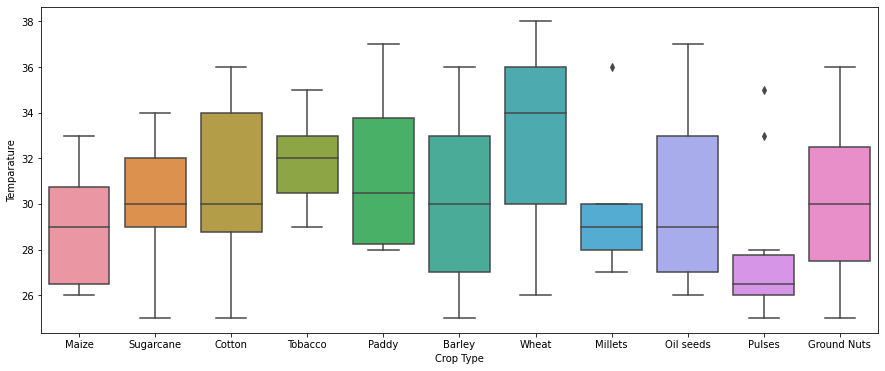

In [108]:
#relation of crop type with temperature
plt.figure(figsize=(15,6))
sns.boxplot(x=fertilizer_dataset['Crop Type'],y=fertilizer_dataset['Temparature'])

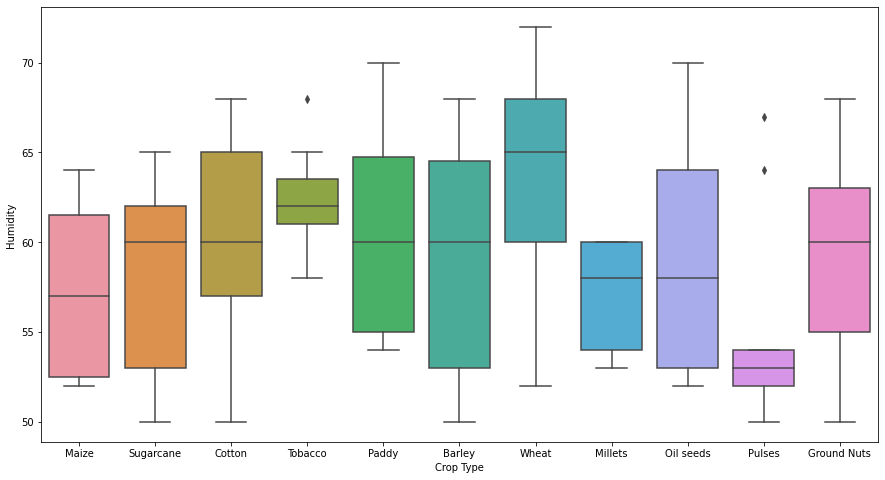

In [109]:
#relation of crop type with Humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=fertilizer_dataset['Crop Type'],y=fertilizer_dataset['Humidity '])

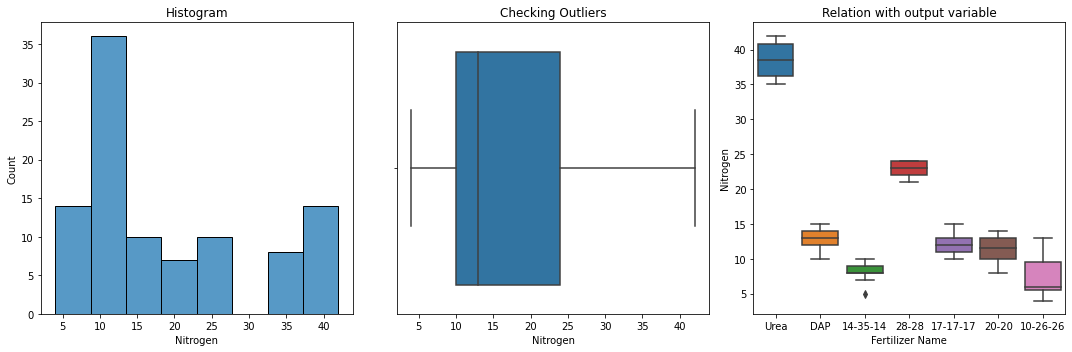

In [110]:
#EDA - Nitrogen variable
plot_conti(fertilizer_dataset['Nitrogen'])

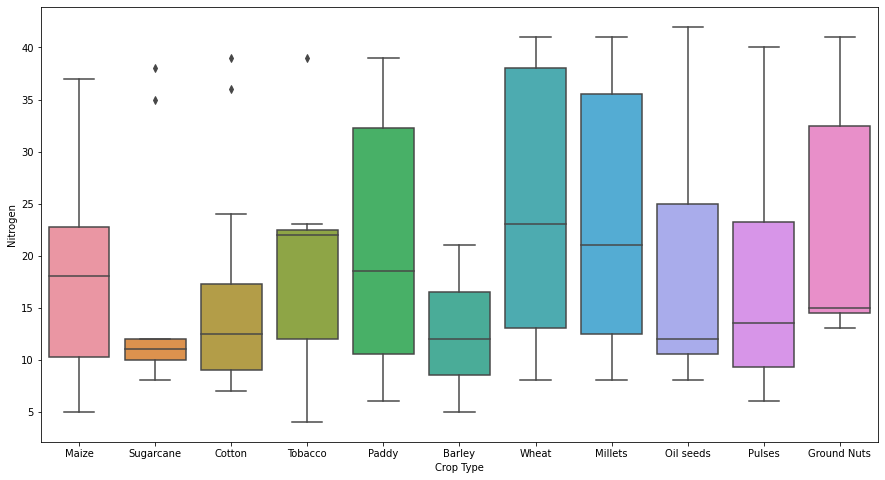

In [111]:
#relation of nitrogen wrt to crop type
plt.figure(figsize=(15,8))
sns.boxplot(x=fertilizer_dataset['Crop Type'],y=fertilizer_dataset['Nitrogen'])

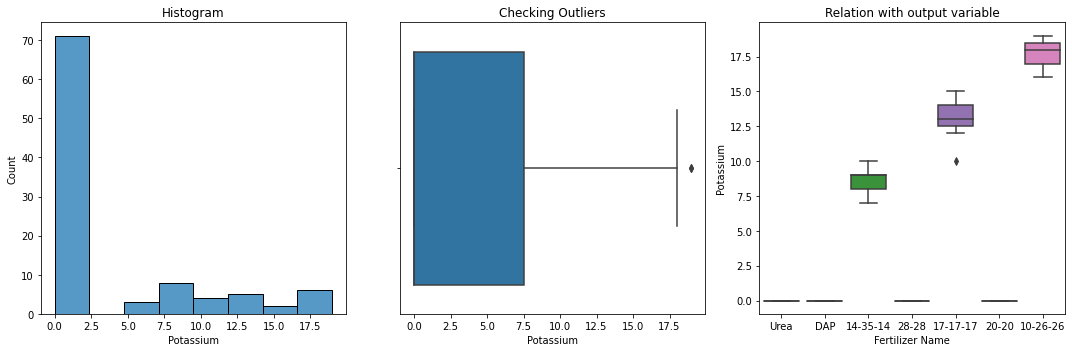

In [112]:
#EDA - Potassium variable
plot_conti(fertilizer_dataset['Potassium'])

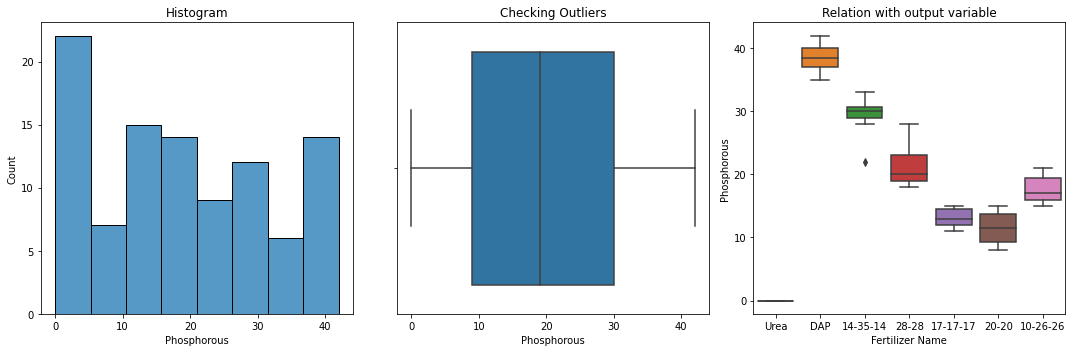

In [113]:
#EDA - Phosphorous variable
plot_conti(fertilizer_dataset['Phosphorous'])

### Target values report

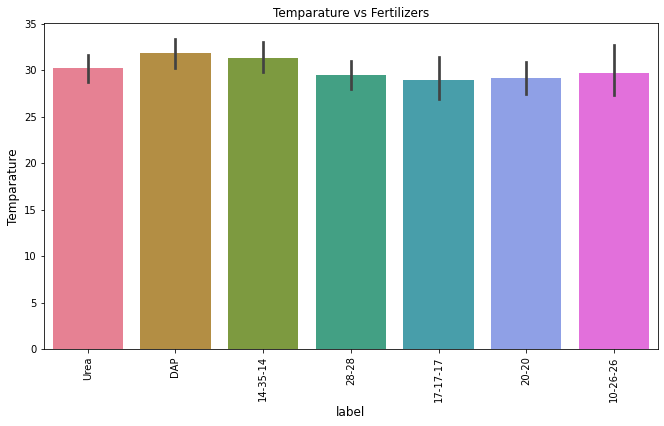

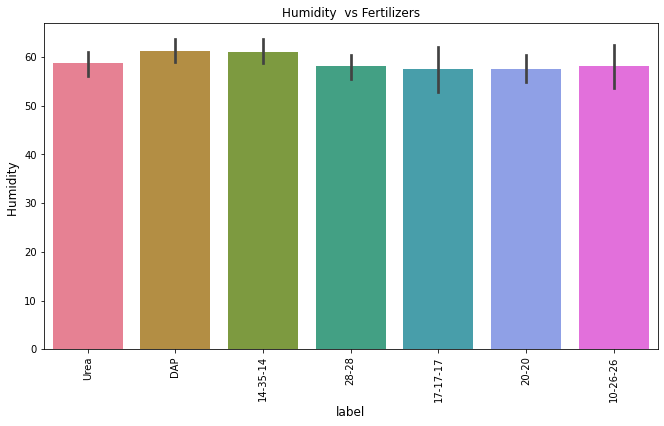

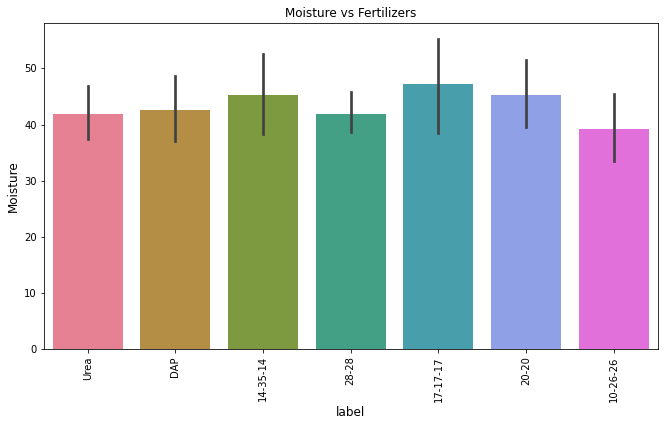

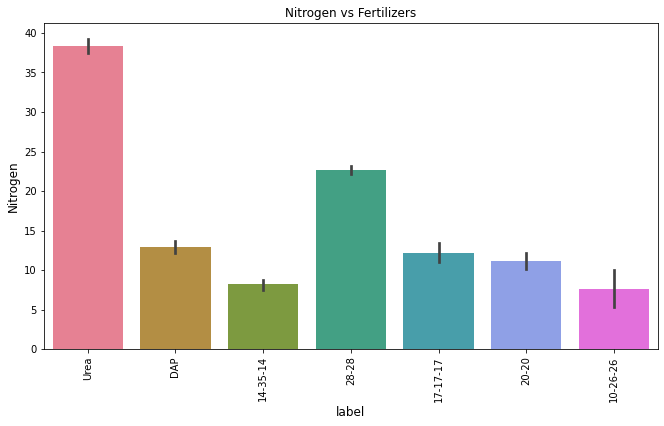

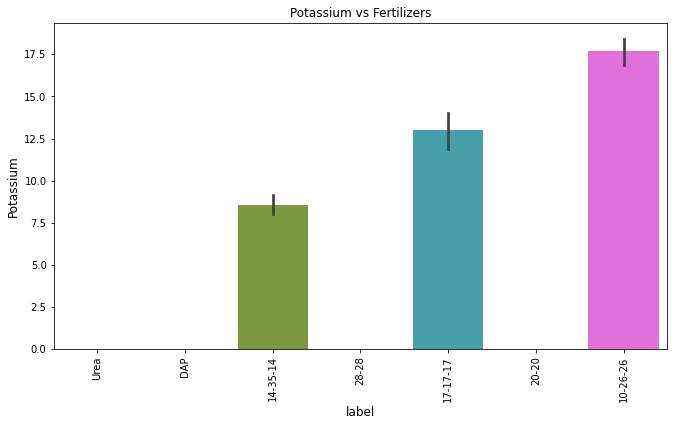

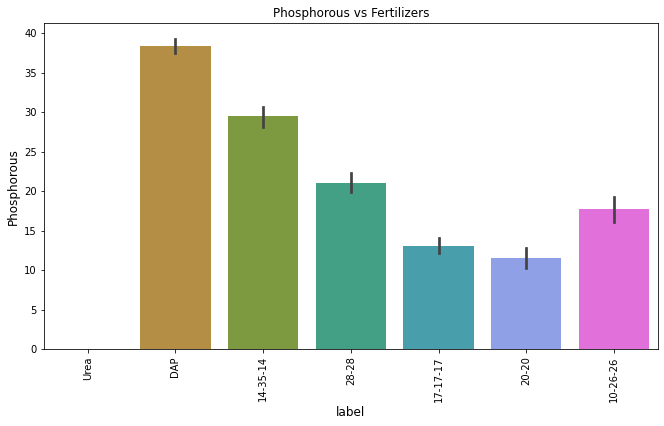

In [114]:
# fertilizer_dataset.columns
targeted_values = fertilizer_dataset.drop(['Soil Type' , 'Crop Type', 'Fertilizer Name'], axis = 1)
# targeted_values
for column in targeted_values:
    plt.figure(figsize = (11, 6))
    sns.barplot(data = fertilizer_dataset, x = 'Fertilizer Name', y = column,  palette = 'husl')
    plt.xlabel('label', fontsize = 12)
    plt.ylabel(column, fontsize = 12)
    plt.xticks(rotation=90)
    plt.title(f'{column} vs Fertilizers')
    plt.show()

<Figure size 720x1224 with 0 Axes>

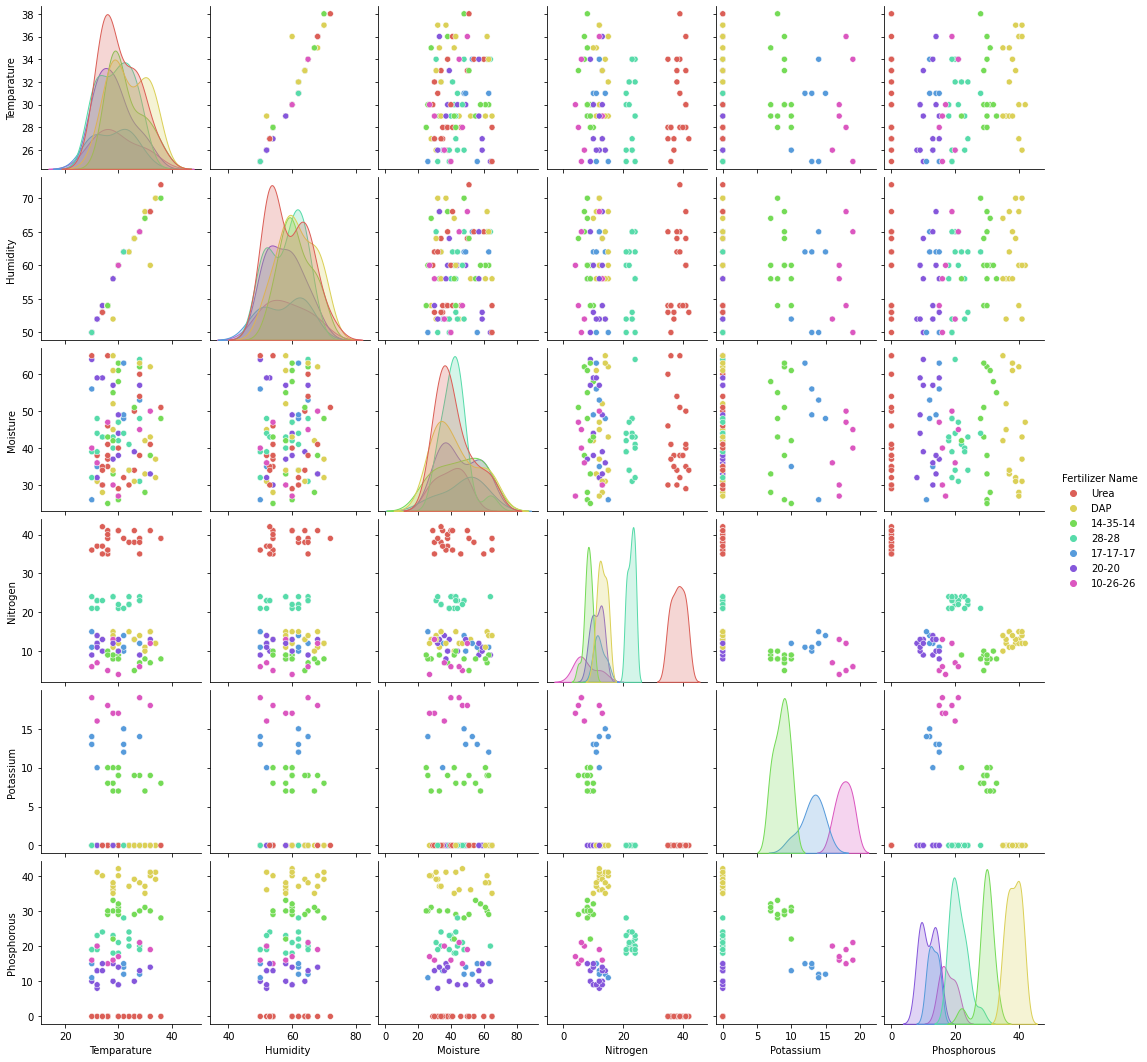

In [115]:
plt.figure(figsize = (10, 17))
sns.pairplot(fertilizer_dataset, hue = 'Fertilizer Name', palette = 'hls')
plt.show()

### Correlation Matrix

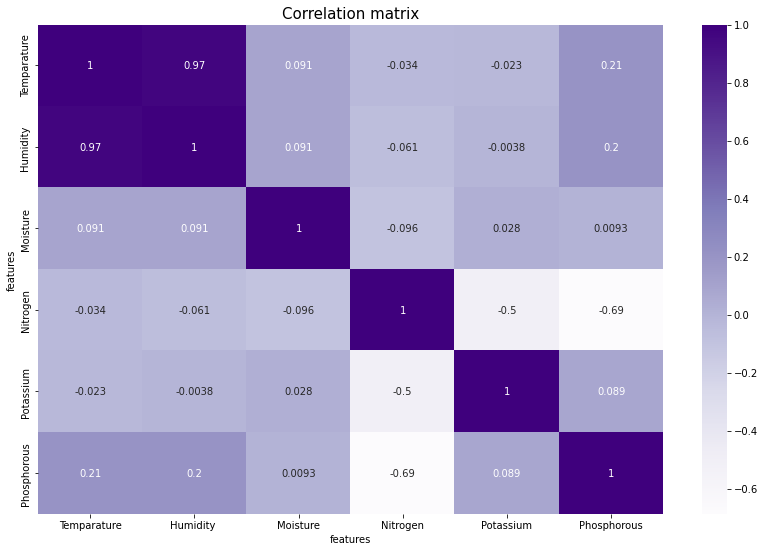

In [116]:
#Correlation matrix dataset 1
fig, ax = plt.subplots(1, 1, figsize=(14, 9))
sns.heatmap(fertilizer_dataset.corr(), annot=True,cmap='Purples')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation matrix', fontsize = 15, c='black')
plt.show()

### Boxplots

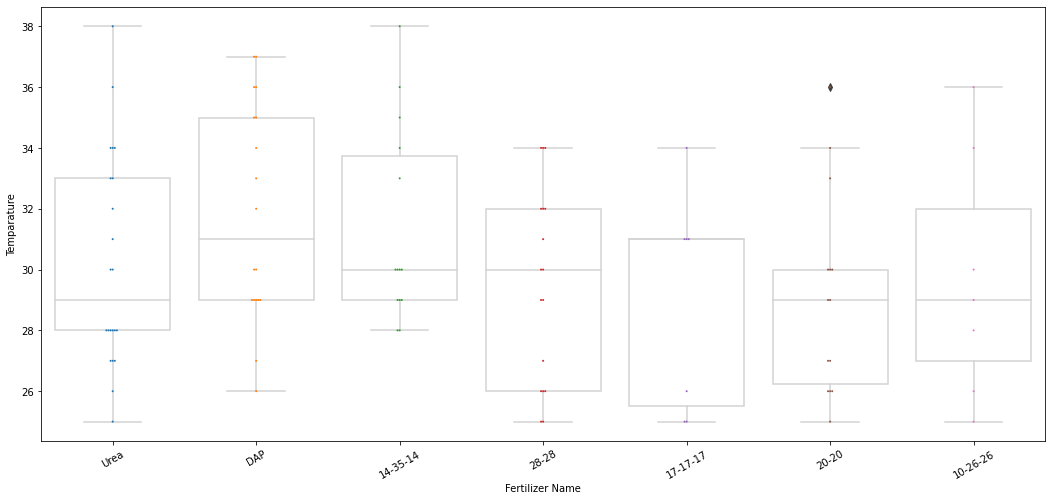

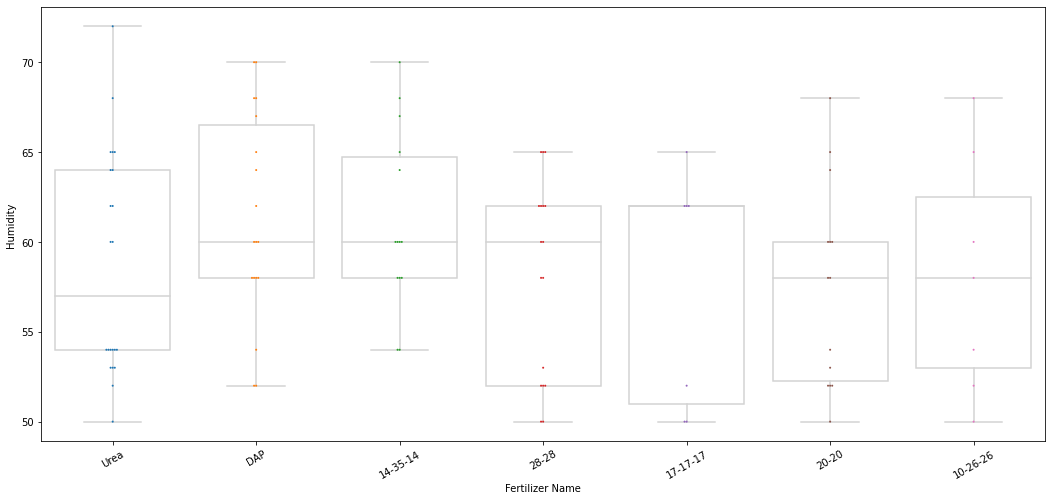

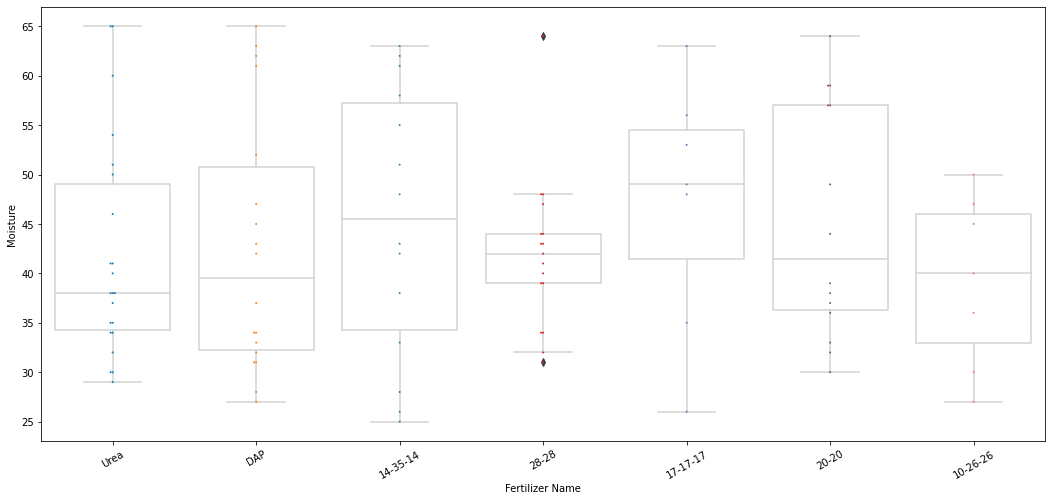

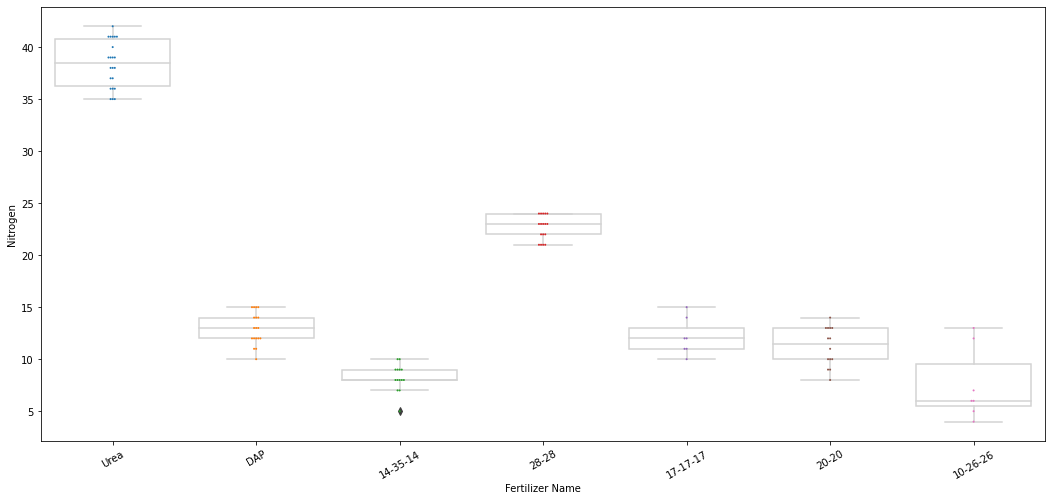

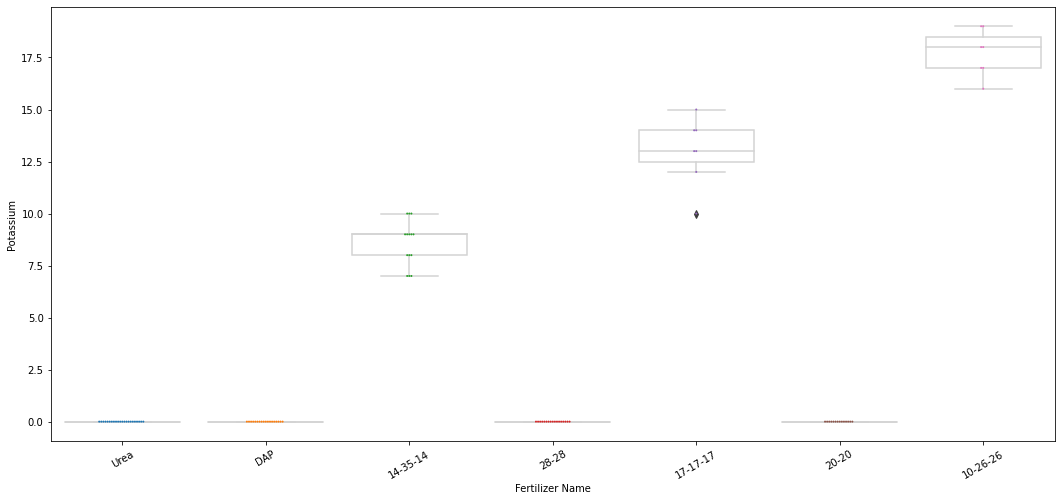

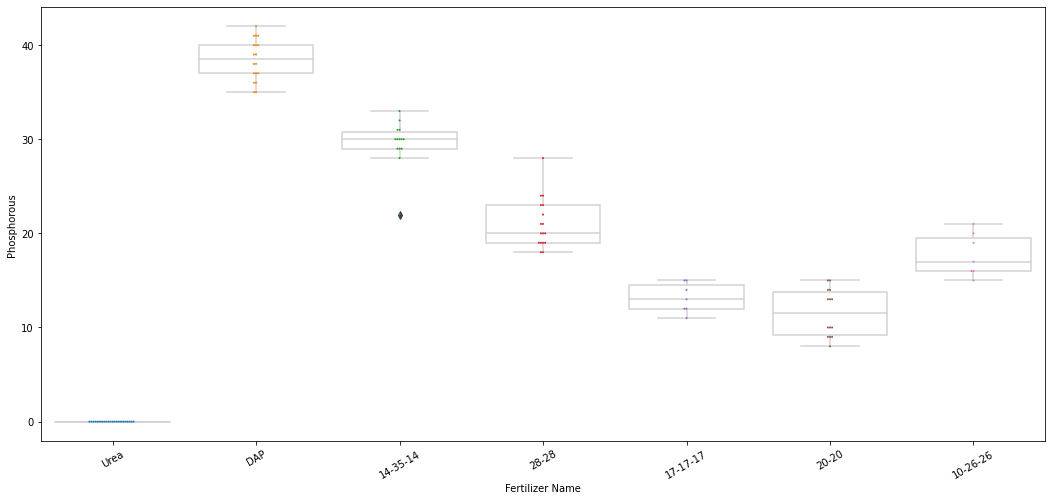

In [117]:
# Boxplots by themselves are misleading (and Violinplots are exhausting)
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor': 'lightgrey'},
    'medianprops':{'color':'lightgrey'},
    'whiskerprops':{'color':'lightgrey'},
    'capprops':{'color':'lightgrey'}
}



for col in targeted_values.columns:
    plt.figure(figsize = (18,8))
    ax = sns.boxplot(x="Fertilizer Name", y=col, data=fertilizer_dataset, **PROPS)
    ax = sns.swarmplot(x="Fertilizer Name", y=col, data=fertilizer_dataset, size=2)
    plt.xticks(rotation = 30)
    plt.show()

# Preprocessing 

In [118]:
le_soil= preprocessing.LabelEncoder()
le_crop = preprocessing.LabelEncoder()


fertilizer_dataset['Soil Type'] = le_soil.fit_transform(fertilizer_dataset['Soil Type'])
fertilizer_dataset['Crop Type'] = le_crop.fit_transform(fertilizer_dataset['Crop Type'])

fertilizer_dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


In [119]:
y = fertilizer_dataset['Fertilizer Name'].copy()
X = fertilizer_dataset.drop('Fertilizer Name', axis=1).copy()

# Spliting

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

# Scaling

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model

In [122]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predict Accuracy

In [123]:
y_pred = classifier.predict(X_test)
x_pred = metrics.accuracy_score(y_test, y_pred)
print("RF's Accuracy of  Dataset is: ", x_pred)


RF's Accuracy of  Dataset is:  0.9666666666666667


In [ ]:
# results = crops_recomendation_model1.score(Xtest_df1, Ytest_df1)
# print(results)
def engine():
  print("Please input values\n")
  soil = input("please choose soil type\n")
  temp = input("please input temp\n")
  humi = input("enter humidity\n")
  ph = input("please enter ph \n")
  rain = input("please enter also rainfall in mm\n")
  convertedLabel = le1.transform([soil])
  data = np.array([[convertedLabel,int(temp), int(humi), int(ph), int(rain)]])
  prediction_crop = crops_recomendation_model1.predict(data)
  print(prediction_crop)

engine()

Please input values

please choose soil type
Alluvial
please input temp
20
enter humidity
80
please enter ph 
6
please enter also rainfall in mm
200
['rice']


# Report

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       0.80      1.00      0.89         4
    17-17-17       1.00      0.50      0.67         2
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         7
        Urea       1.00      1.00      1.00         7

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.94        30
weighted avg       0.97      0.97      0.96        30



# Confusion Matrix

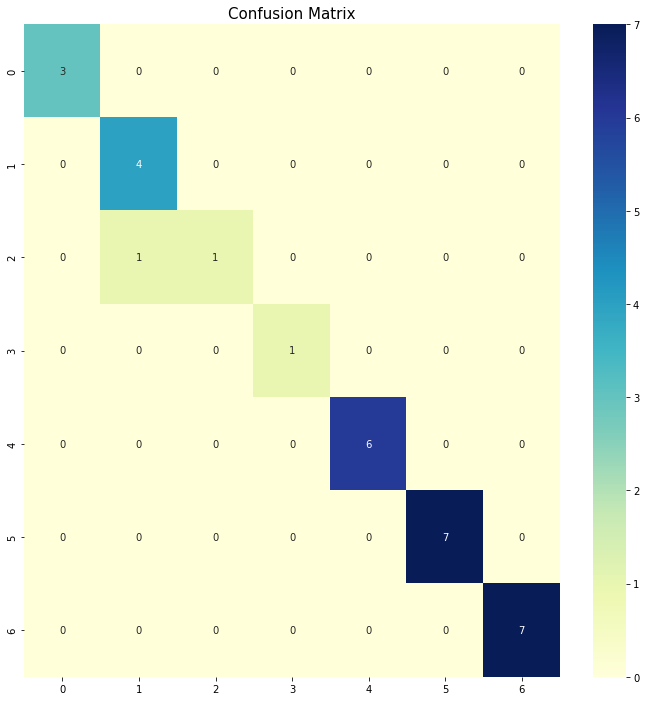

In [125]:
#Confusion matrix
plt.figure(figsize=(12,12))
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# Prediction

In [128]:
def call_fertilizer_model( temp, humidity, moisture, soil, crop, n, k , p):
  data = np.array([[temp, humidity, moisture, soil, crop, n, k , p]])
  prediction = classifier.predict(data)
  print(prediction)

def engine():
  print("Please input values\n")
  
  temp = input("please input temp\n")
  humi = input("enter humidity\n")
  moisture = input("please enter ph \n")
  soil = input("please choose soil type\n")
  crop = input("please choose crop type\n")
  n = input("please enter n value\n")
  k= input("please enter pottasium value\n")
  p= input("please enter phosporus value\n")
  convertedLabelSoil = le_soil.transform([soil])
  convertedLabelCrop = le_crop.transform([crop])
  # call_fertilizer_model(int(n),int(p),int(k),convertedLabel, int(temp),int(humi),int(ph), int(rain))
  call_fertilizer_model(int(temp), int(humi), int(moisture), convertedLabelSoil, convertedLabelCrop, int(n), int(k), int(p))

engine()


Please input values

please input temp
29
enter humidity
58
please enter ph 
57
please choose soil type
Black
please choose crop type
Sugarcane
please enter n value
12
please enter pottasium value
0
please enter phosporus value
10
['Urea']


# Saving Model

In [129]:
# save the model to disk
filename = 'fertilizer_recomendation_model.pickle'
path = "/content/drive/MyDrive/TrainedModels/"
pickle_out = open(path+filename, 'wb')
pickle.dump(classifier, pickle_out)
pickle_out.close()

# Loading Model

In [130]:
filename = 'fertilizer_recomendation_model.pickle'
path = "/content/drive/MyDrive/TrainedModels/"
pickle_in = open(path+filename, 'rb')
fertilizer_recomendation_model = pickle.load(pickle_in)

# Checking Model and printing Results

In [132]:
results = fertilizer_recomendation_model.score(X_test, y_test)
print(results)



0.9666666666666667
